## **Balanced QA Dataset Split with Topic Stratification**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Upload the CSV file via Colab's file uploader
# from google.colab import files
# uploaded = files.upload()

# Load it into a DataFrame
# import io
# df = pd.read_csv(io.BytesIO(uploaded['cleaned.csv']))
df = pd.read_csv('cleaned.csv')

In [5]:
# View how many samples per topic
topic_distribution = df['topic'].value_counts()
print(topic_distribution)

topic
depression                  136
intimacy                    108
relationships               104
anxiety                     100
family-conflict              60
parenting                    54
self-esteem                  42
relationship-dissolution     33
behavioral-change            31
anger-management             26
trauma                       24
marriage                     20
domestic-violence            16
lgbtq                        15
social-relationships         12
workplace-relationships      11
substance-abuse              10
grief-and-loss                8
spirituality                  7
counseling-fundamentals       7
legal-regulatory              6
professional-ethics           6
eating-disorders              5
sleep-improvement             5
human-sexuality               4
addiction                     4
diagnosis                     3
stress                        3
children-adolescents          2
military-issues               1
Name: count, dtype: int64


In [6]:
# Define a threshold for "too rare to split" (e.g., <5 samples)
min_count_for_split = 5
topic_counts = df['topic'].value_counts()
rare_topics = topic_counts[topic_counts < min_count_for_split].index.tolist()

# Separate data
df_rare = df[df['topic'].isin(rare_topics)]
df_common = df[~df['topic'].isin(rare_topics)]

In [7]:
# Split data that has enough samples to stratify
train_df, test_df = train_test_split(
    df_common,
    test_size=0.2,
    stratify=df_common['topic'],
    random_state=42
)

# Add rare data to training set only
train_df = pd.concat([train_df, df_rare], ignore_index=True)

# Check sizes
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 693
Test set size: 170


In [8]:
print("Train distribution:")
print(train_df['topic'].value_counts(normalize=True).round(2))

print("\nTest distribution:")
print(test_df['topic'].value_counts(normalize=True).round(2))

Train distribution:
topic
depression                  0.16
intimacy                    0.12
relationships               0.12
anxiety                     0.12
family-conflict             0.07
parenting                   0.06
self-esteem                 0.05
relationship-dissolution    0.04
behavioral-change           0.04
anger-management            0.03
trauma                      0.03
marriage                    0.02
domestic-violence           0.02
lgbtq                       0.02
workplace-relationships     0.01
social-relationships        0.01
substance-abuse             0.01
grief-and-loss              0.01
spirituality                0.01
counseling-fundamentals     0.01
professional-ethics         0.01
legal-regulatory            0.01
eating-disorders            0.01
sleep-improvement           0.01
human-sexuality             0.01
addiction                   0.01
diagnosis                   0.00
stress                      0.00
children-adolescents        0.00
military-issues  

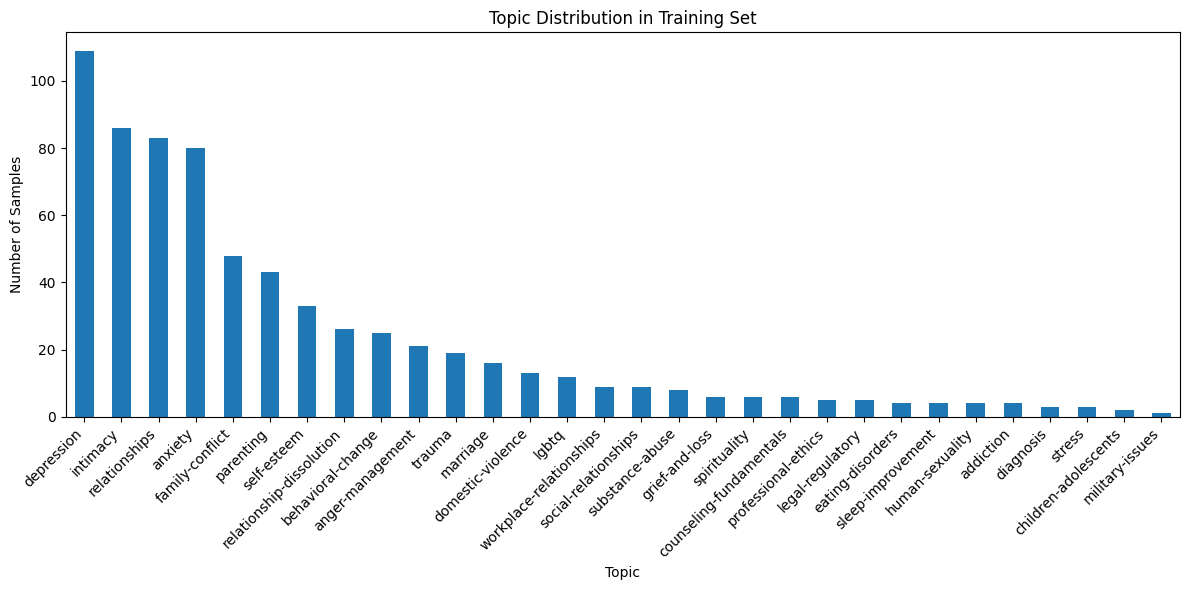

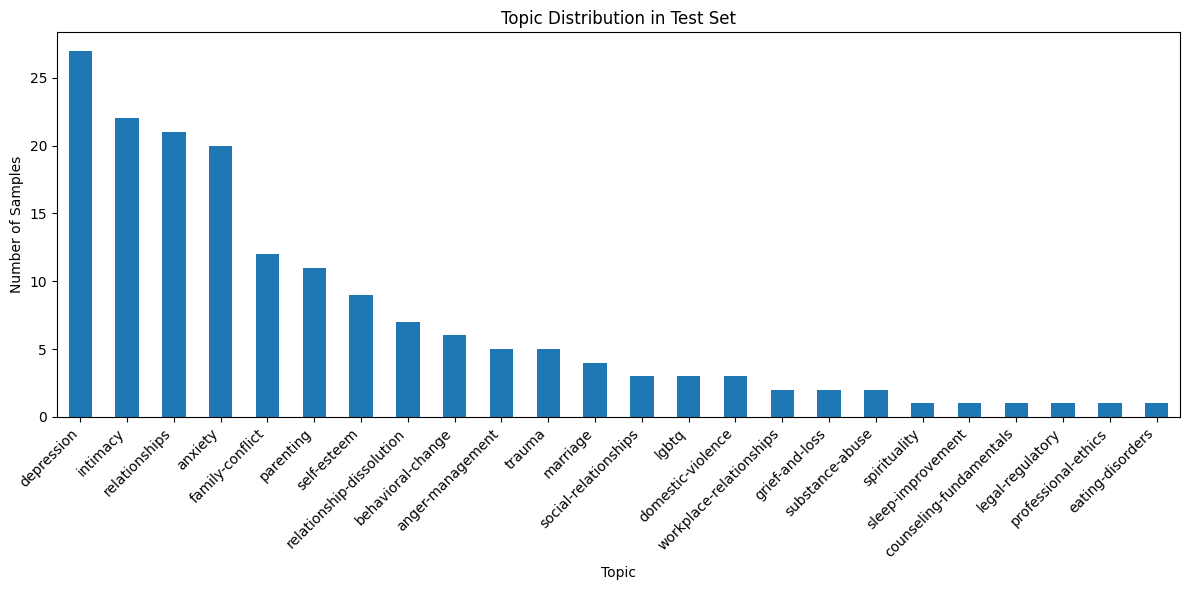

In [9]:
import matplotlib.pyplot as plt

def plot_topic_distribution(df, title):
    counts = df['topic'].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel("Topic")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot train and test topic distributions
plot_topic_distribution(train_df, "Topic Distribution in Training Set")
plot_topic_distribution(test_df, "Topic Distribution in Test Set")

In [10]:
# Show 3 random samples from each set
print("🔹 Training Set Examples")
display(train_df[['questionTitle', 'topic', 'answerText']].sample(3, random_state=1))

print("\n🔹 Test Set Examples")
display(test_df[['questionTitle', 'topic', 'answerText']].sample(3, random_state=2))

🔹 Training Set Examples


,questionTitle,topic,answerText
600,I’ve suffered from insomnia and nightmares for...,sleep-improvement,You’re noticing that as you lie down to go to ...
23,Did I make a mistake breaking up with a guy wh...,relationship-dissolution,It sounds like you were in a tough spot here.I...
214,How can I best fight the winter blues?,depression,Seasonal Affective Disorder (S.A.D.) is a term...



🔹 Test Set Examples


,questionTitle,topic,answerText
503,I'm very depressed?,depression,You have already taken the brave first step of...
621,How do I let go of the abuse my dad showed me?,trauma,I am so sorry to hear that you are struggling....
572,How do I get over jealousy?,intimacy,It may be important to look at this as getting...


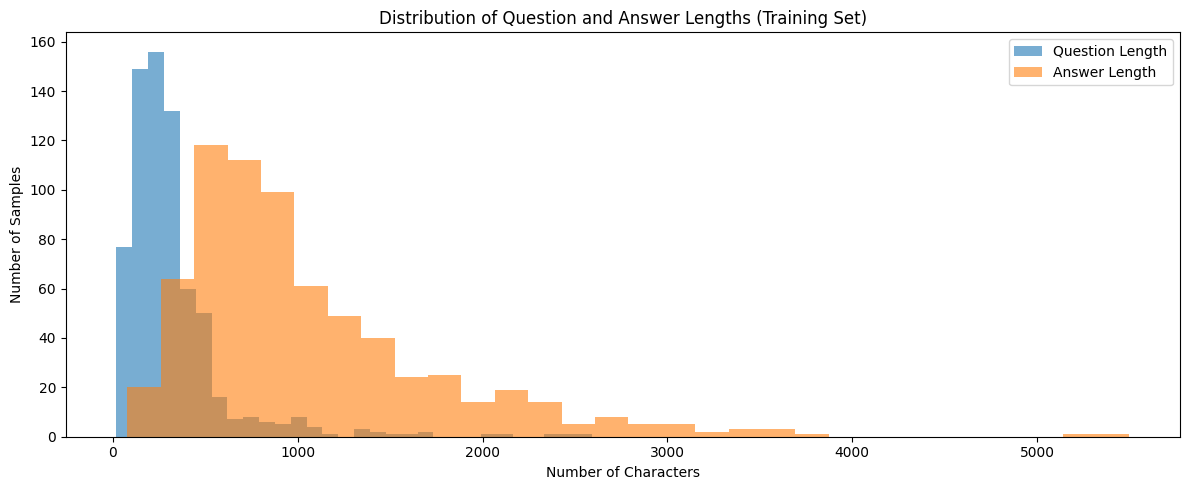

In [11]:
import matplotlib.pyplot as plt

# Compute lengths
train_df['question_length'] = train_df['questionText'].str.len()
train_df['answer_length'] = train_df['answerText'].str.len()

# Plot histograms
plt.figure(figsize=(12, 5))
plt.hist(train_df['question_length'], bins=30, alpha=0.6, label='Question Length')
plt.hist(train_df['answer_length'], bins=30, alpha=0.6, label='Answer Length')
plt.title("Distribution of Question and Answer Lengths (Training Set)")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Samples")
plt.legend()
plt.tight_layout()
plt.show()


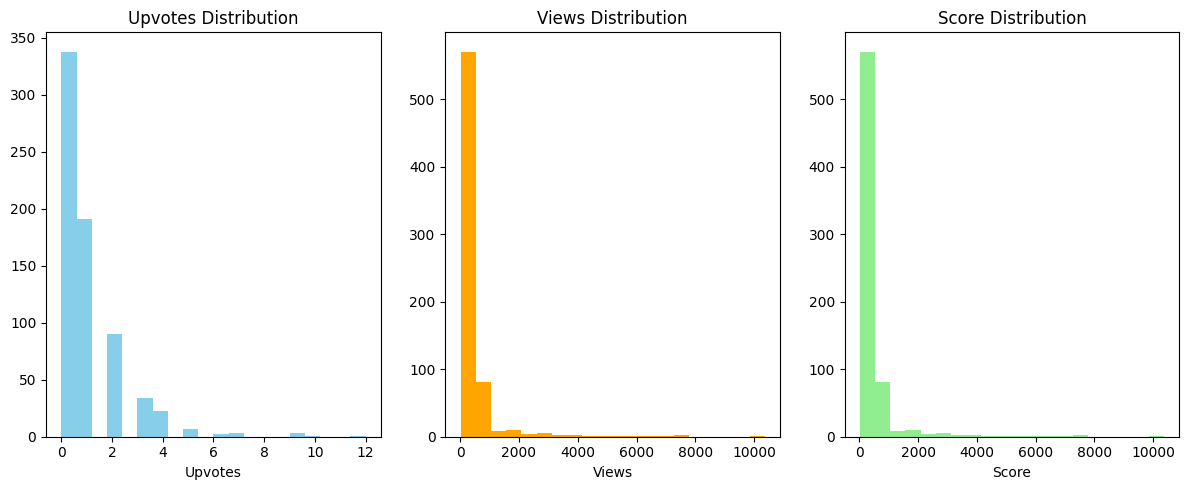

In [12]:
# Plot score-related attributes
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(train_df['upvotes'], bins=20, color='skyblue')
plt.title("Upvotes Distribution")
plt.xlabel("Upvotes")

plt.subplot(1, 3, 2)
plt.hist(train_df['views'], bins=20, color='orange')
plt.title("Views Distribution")
plt.xlabel("Views")

plt.subplot(1, 3, 3)
plt.hist(train_df['score'], bins=20, color='lightgreen')
plt.title("Score Distribution")
plt.xlabel("Score")

plt.tight_layout()
plt.show()

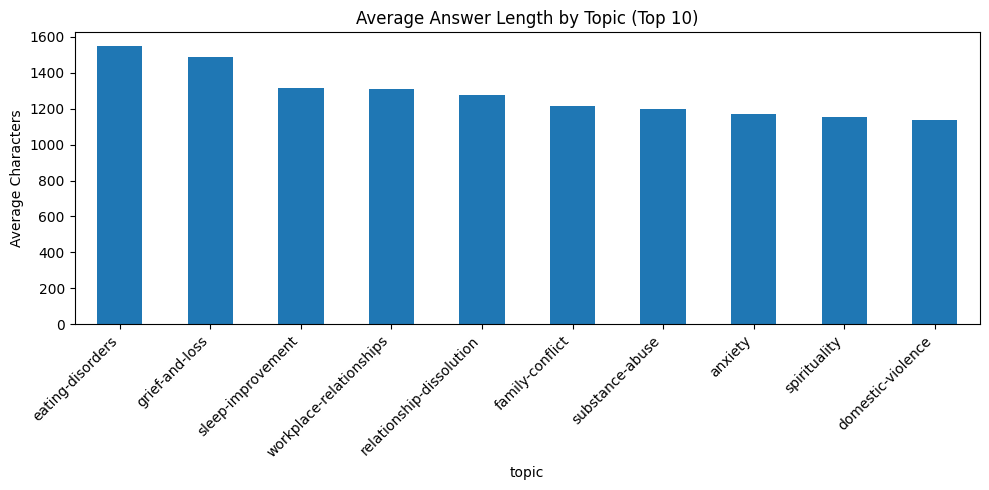

In [13]:
# Group and compute average answer length
avg_answer_len = train_df.groupby('topic')['answerText'].apply(lambda x: x.str.len().mean())
avg_answer_len = avg_answer_len.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
avg_answer_len.plot(kind='bar')
plt.title("Average Answer Length by Topic (Top 10)")
plt.ylabel("Average Characters")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

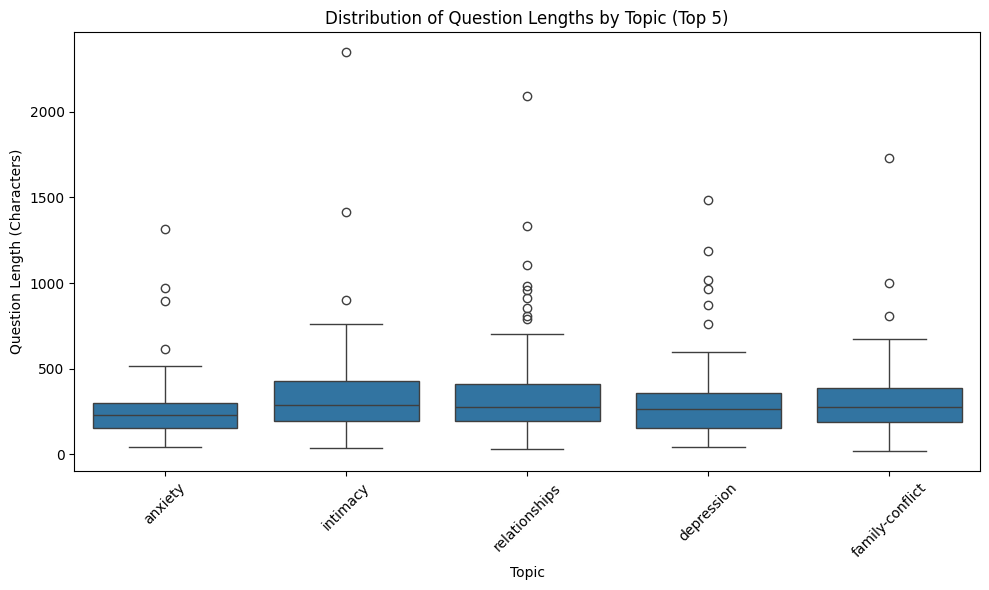

In [14]:
import seaborn as sns

# Optional: install seaborn in Colab if not already
# !pip install seaborn

# Select top 5 most frequent topics
top_topics = train_df['topic'].value_counts().head(5).index
subset = train_df[train_df['topic'].isin(top_topics)]

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='topic', y='question_length', data=subset)
plt.title("Distribution of Question Lengths by Topic (Top 5)")
plt.xlabel("Topic")
plt.ylabel("Question Length (Characters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Save to files
train_df.to_csv("train_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)

# Download
# files.download("train_split.csv")
# files.download("test_split.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>